Let's look at a sample of $Z$ boson candidates, particularly those that decay to two electrons. A selection has already been performed on the DoubleElectron sample collected by the CMS Experiment in 2011. 

(Most selections contained in this notebook come from those specified and described in "Measurement of the Inclusive W and Z Production Cross Sections in pp Collisions at $\sqrt{s}$ = 7 TeV" by the CMS Collaboration [arXiv:1107.4789].)

The selection code is here: https://github.com/tpmccauley/Zee-filter

The selections used on the two electrons:
* 60 < $M_{ee}$ < 120 GeV
* $p_{t}$ > 25 GeV

The following variables are output to a csv file

Run,Event,
pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,isoEcal1,isoHcal1,
pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2

where (there are two sets of variables, one for each electron)

* Run, Event are the run and event numbers, respectively
* pt is the transverse momentum $p_{t}$ of the electron
* eta is the pseudorapidity of the electron: $\eta$
* phi is the $\phi$ angle of the electron direction
* Q is the charge of the electron
* type is either EB or EE: whether the electron is in the barrel or in the endcap
* sigmaEtaEta is the weighted cluster rms along $\eta$: $\sigma_{\eta\eta}$
* HoverE is the HCAL energy / ECAL energy
* isoTrack is the isolation variable for tracks
* isoEcal is the isolation variable for the ECAL
* isoHcal is the isolation variable for the HCAL

Let's read in the csv to a data frame and calculate the invariant mass $M$ of the two electrons where

$M = \sqrt{2p_{t}^{1}p_{t}^{2}(\cosh(\eta_{1}-\eta_{2}) - \cos(\phi_{1}-\phi_{2}))}$

adding a M column to the data frame:

In [1]:
import scipy

In [2]:
import math
import numpy as np
import pandas as pd

df = pd.read_csv('./data/Zee_Run2011A.csv')
df['M'] = np.sqrt(2*df.pt1*df.pt2*(np.cosh(df.eta1-df.eta2) - np.cos(df.phi1-df.phi2)))

df.head()

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2,M
0,163286,109060857,37.5667,2.289180,2.052600,-1,EE,0.025125,0.008973,0.00000,...,1.47064,-1.16305,1,EB,0.000753,0.000000,0.000000,1.019030,0.000000,89.589562
1,163286,109275715,36.2901,-0.837253,-1.585920,1,EB,0.007829,0.043751,0.00000,...,-0.48957,1.04960,-1,EB,0.011246,0.000000,0.718473,1.846060,0.000000,92.252290
2,163286,109075352,25.9705,-0.697420,1.635990,-1,EB,0.009715,0.040728,6.28701,...,-2.04009,3.11875,1,EE,0.025972,0.028008,15.217000,4.533720,3.836990,67.859158
3,163286,109169766,41.0075,1.461920,-0.532464,1,EB,0.008753,0.000000,0.00000,...,1.15606,2.47858,-1,EB,0.008590,0.000000,0.000000,2.438830,0.567555,87.604923
4,163286,108947653,39.8985,-0.592666,-2.394720,1,EB,0.015261,0.000000,2.54347,...,-2.24444,0.61061,-1,EE,0.029025,0.000000,12.422900,0.453359,0.909608,101.426755


What does the invariant mass of the Z look like?

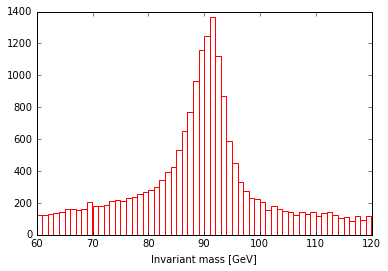

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

M_hist = np.histogram(df.M, bins=60, range=(60,120))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='r')
plt.xlabel('Invariant mass [GeV]')
plt.show()


Let's select events where the electrons are of opposite sign, which is what we expect from $Z \rightarrow e^{+}e^{-}$

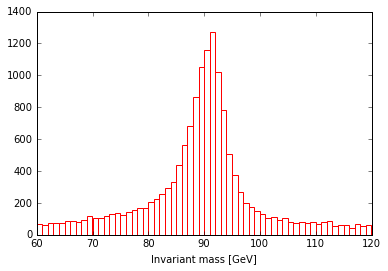

In [4]:
oppsign = df[(df.Q1 != df.Q2)]

M_hist = np.histogram(oppsign.M, bins=60, range=(60,120))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='r')
plt.xlabel('Invariant mass [GeV]')
plt.show()

What does the invariant mass look like when both electrons are in the barrel of the ECAL?

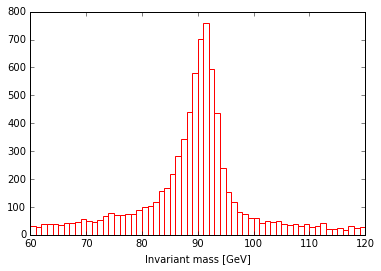

In [5]:
eb = oppsign[(oppsign.type1 == 'EB') & (oppsign.type2 == 'EB')]

M_hist = np.histogram(eb.M, bins=60, range=(60,120))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='r')
plt.xlabel('Invariant mass [GeV]')
plt.show()

What about if we apply the following selections?

* $\sigma_{\eta\eta}$ < 0.01
* H/E < 0.05
* isoTrack / $E_{T}$ < 0.1
* isoEcal / $E_{T}$ < 0.1
* isoHcal / $E_{T}$ < 0.1

In [6]:
select = eb[(eb.sigmaEtaEta1 < 0.01) & (eb.sigmaEtaEta2 < 0.01) &
            (eb.HoverE1 < 0.05) & (eb.HoverE2 < 0.05) &
            (eb.isoTrack1/eb.pt1 < 0.1) & (eb.isoTrack2/eb.pt2 < 0.1) &
            (eb.isoEcal1/eb.pt1 < 0.1) & (eb.isoEcal2/eb.pt2 < 0.1) &
            (eb.isoHcal1/eb.pt1 < 0.1) & (eb.isoHcal2/eb.pt2 < 0.1)]

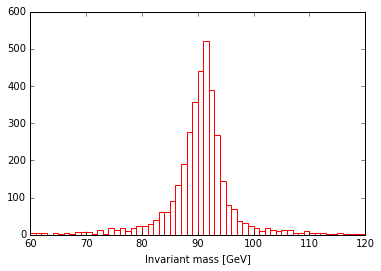

In [7]:
M_hist = np.histogram(select.M, bins=60, range=(60,120))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='r')
plt.xlabel('Invariant mass [GeV]')
plt.show()